In [5]:
import pandas as pd
import os

import os
import tarfile
import urllib.request
HOUSING_PATH = "C:/Users/nagar/ml-projects/housing-price-prediction/datasets/housing"

def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


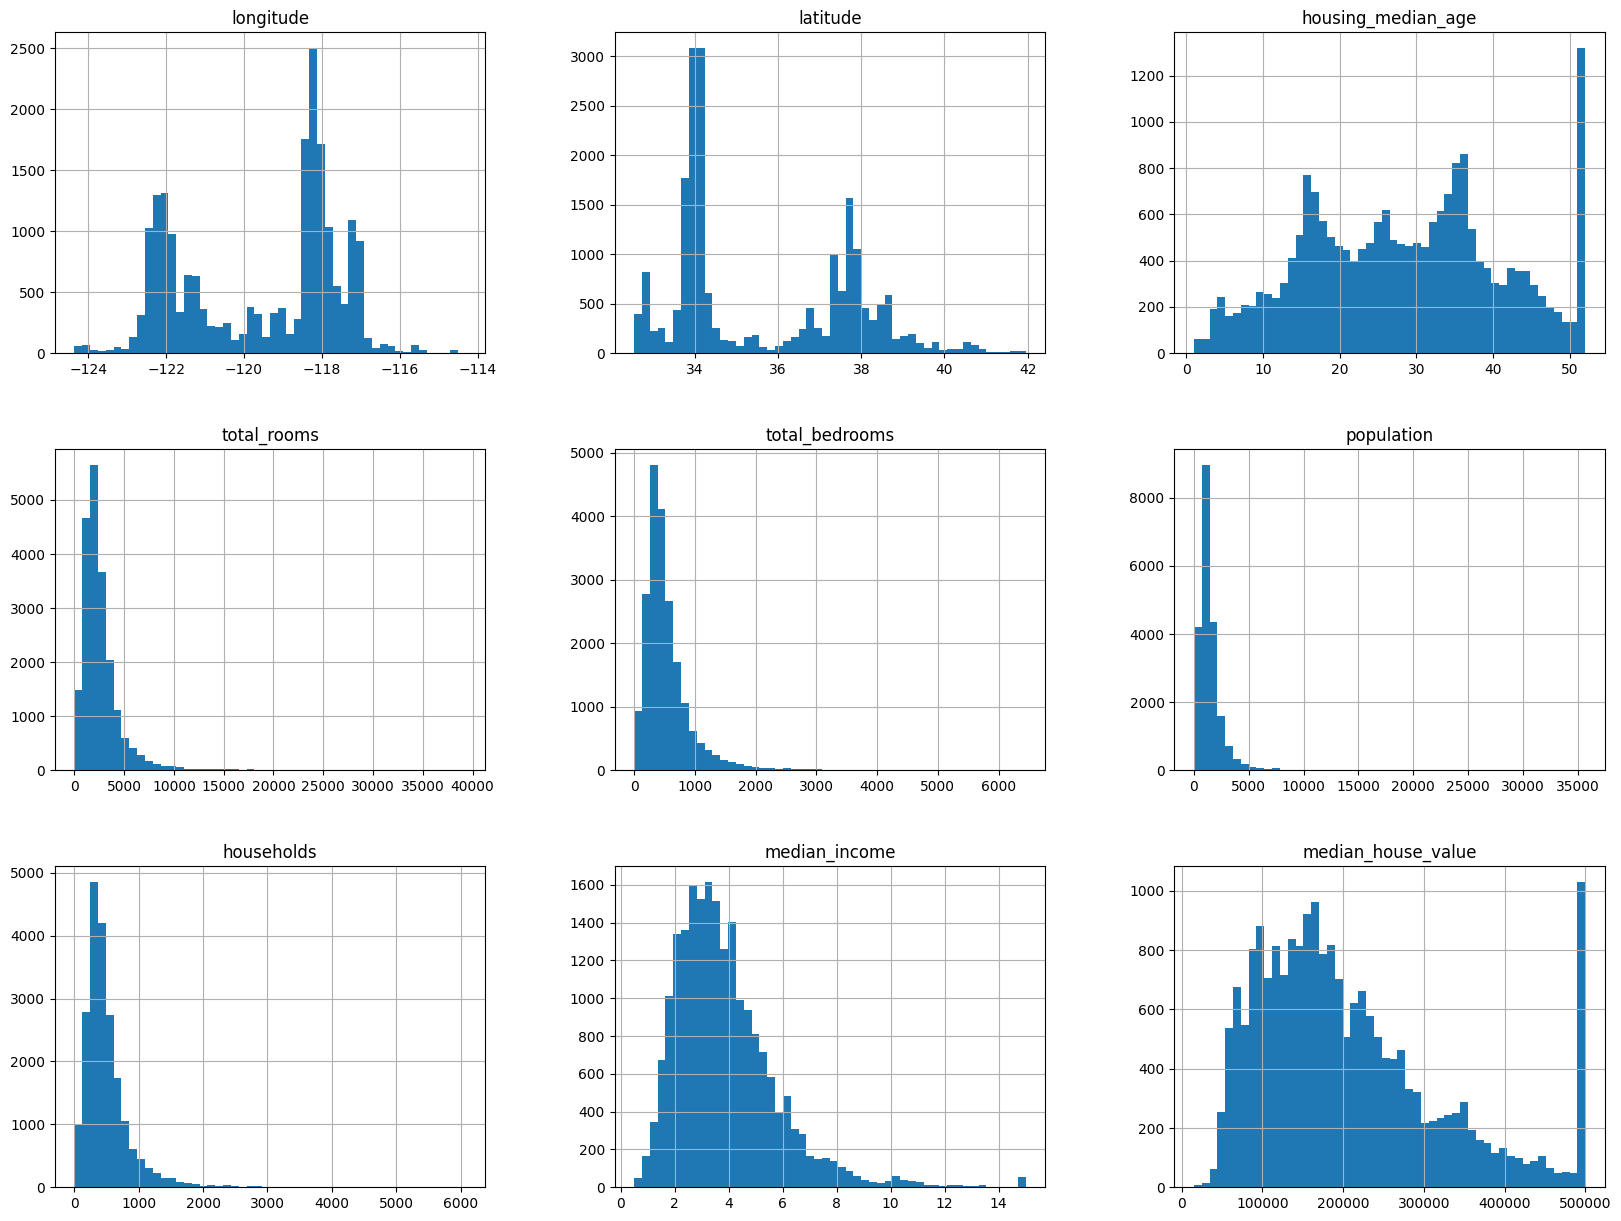

In [11]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: >

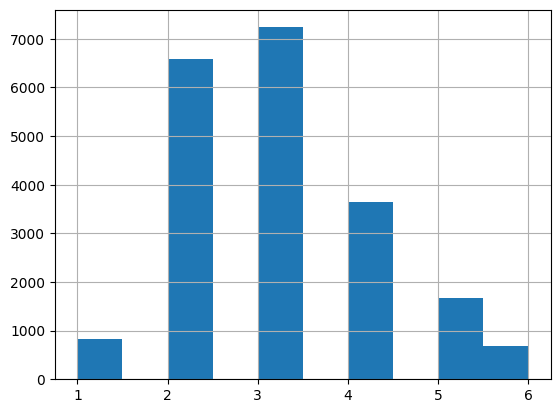

In [12]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., 8., float('inf')],
                               labels = [1, 2, 3, 4, 5, 6])

housing['income_cat'].hist()


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2102,-119.77,36.74,50.0,1325.0,280.0,811.0,281.0,1.8667,62800.0,INLAND
11688,-118.00,33.88,18.0,2628.0,720.0,2276.0,649.0,2.7350,170800.0,<1H OCEAN
11054,-117.86,33.78,25.0,2635.0,660.0,1710.0,634.0,3.1250,215000.0,<1H OCEAN
5647,-118.29,33.74,29.0,1503.0,411.0,1368.0,390.0,2.1473,195300.0,NEAR OCEAN
14109,-117.11,32.75,34.0,2131.0,594.0,1373.0,562.0,2.1130,102100.0,NEAR OCEAN


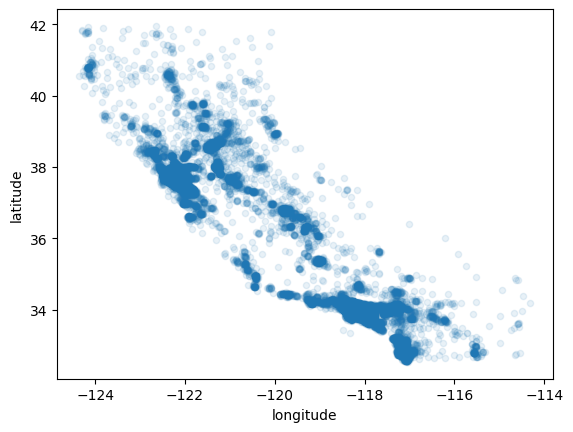

In [41]:
housing = strat_train_set.copy()

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
housing.head()

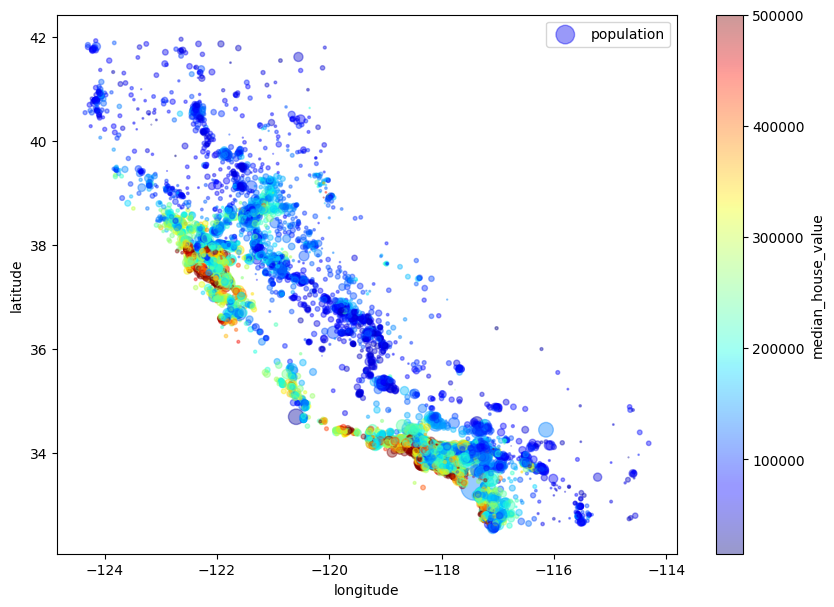

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=housing["population"]/100, label="population", figsize=(10,7),
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
 )
plt.legend()

In [37]:
#corr_matrix = housing.corr(numeric_only=True)
#corr_matrix["median_house_value"].sort_values(ascending=False)

In [38]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

##corr_matrix = housing.corr(numeric_only=True)
#corr_matrix["median_house_value"].sort_values(ascending=False)

In [46]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

housing_num = housing.drop("ocean_proximity", axis=1)
housing_cat = housing[['ocean_proximity']]
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2102,-119.77,36.74,50.0,1325.0,280.0,811.0,281.0,1.8667,INLAND
11688,-118.00,33.88,18.0,2628.0,720.0,2276.0,649.0,2.7350,<1H OCEAN
11054,-117.86,33.78,25.0,2635.0,660.0,1710.0,634.0,3.1250,<1H OCEAN
5647,-118.29,33.74,29.0,1503.0,411.0,1368.0,390.0,2.1473,NEAR OCEAN
14109,-117.11,32.75,34.0,2131.0,594.0,1373.0,562.0,2.1130,NEAR OCEAN


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('cat_encoder', OneHotEncoder(sparse_output=False)),
    ('cat_imputer', SimpleImputer(strategy="most_frequent"))
])

num_attributes = list(housing_num)
cat_attributes = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes)
])

housing_prepared = full_pipeline.fit_transform(housing)


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
housing_predictions = lin_reg.predict(housing_prepared)
mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(mse)
lin_rmse

np.float64(68836.76064892007)

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([71848.78778279, 69470.01088871, 70778.95920271, 69220.26633783,
       66096.38462858, 70288.52012915, 71643.05213262, 67326.63163988,
       71249.63651479, 71541.12525044])

In [52]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [71848.78778279 69470.01088871 70778.95920271 69220.26633783
 66096.38462858 70288.52012915 71643.05213262 67326.63163988
 71249.63651479 71541.12525044]
Mean: 69946.3374507505
Standard deviation: 1843.624257931571


In [53]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
display_scores(np.sqrt(-lin_scores))

Scores: [70404.43294112 70120.51815742 70138.17381793 67839.14284091
 63958.83981137 71187.97990193 68483.19907587 68474.45178471
 68828.36642834 70664.3786955 ]
Mean: 69009.9483455102
Standard deviation: 1985.282923426989


In [55]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [50110.890939   50678.32565146 47654.05722334 47369.98997052
 45509.12288154 50529.78715879 49865.66712268 48054.87663231
 51098.39785204 52823.03419224]
Mean: 49369.41496239255
Standard deviation: 2057.7329689702387


FINE TUNING

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

,estimator,RandomForestRegressor()
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [58]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}